K-Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, XgBoost, Support Vector Machine, Neural Network

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

import warnings
warnings.filterwarnings('ignore')

c:\users\qiaod\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
voice = pd.read_csv("voice.csv", header=0)
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [4]:
# normalization and split data
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
train, test = train_test_split(voice, test_size=0.3)

In [5]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [6]:
x_train2 = train[["IQR","meanfun"]]
y_train2 = train["label"]
x_test2 = test[["IQR","meanfun"]]
y_test2 = test["label"]

In [7]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [8]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

## K-Nearest Neighbors
Using neighbors.KNeighborsClassifier() to build the model.

In [17]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.013669821240799159 occurs at k=10.


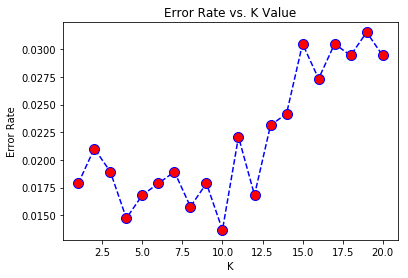

In [18]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [19]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

             precision    recall  f1-score   support

     female     0.9893    0.9830    0.9862       471
       male     0.9834    0.9896    0.9865       480

avg / total     0.9863    0.9863    0.9863       951



Lowest error is 0.027339642481598318 occurs at k=11.


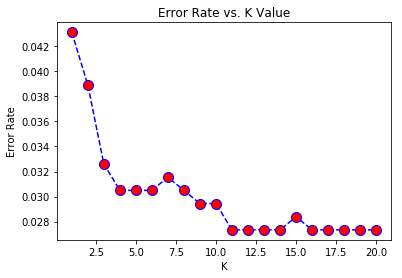

In [20]:
k=knn_error(21,x_train2,y_train2,x_test2,y_test2)

In [21]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train2,y_train2,x_test2,y_test2)

             precision    recall  f1-score   support

     female     0.9806    0.9639    0.9722       471
       male     0.9652    0.9812    0.9731       480

avg / total     0.9728    0.9727    0.9727       951



Lowest error is 0.022082018927444796 occurs at k=7.


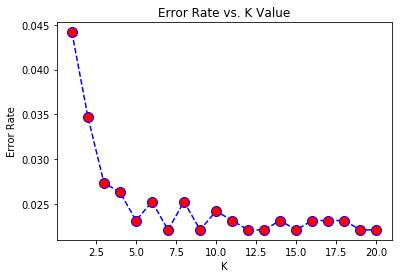

In [22]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

In [23]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

             precision    recall  f1-score   support

     female     0.9871    0.9745    0.9808       471
       male     0.9753    0.9875    0.9814       480

avg / total     0.9811    0.9811    0.9811       951



## Naive Bayes
Using naive_bayes.GaussianNB() to build the model.

In [24]:
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test)

             precision    recall  f1-score   support

     female     0.9289    0.8875    0.9077       471
       male     0.8942    0.9333    0.9134       480

avg / total     0.9114    0.9106    0.9106       951



In [25]:
model=naive_bayes.GaussianNB()
classify(model,x_train2,y_train2,x_test2,y_test2)

             precision    recall  f1-score   support

     female     0.9805    0.9597    0.9700       471
       male     0.9612    0.9812    0.9711       480

avg / total     0.9708    0.9706    0.9706       951



In [26]:
model=naive_bayes.GaussianNB()
classify(model,x_train3,y_train3,x_test3,y_test3)

             precision    recall  f1-score   support

     female     0.9847    0.9575    0.9709       471
       male     0.9594    0.9854    0.9723       480

avg / total     0.9720    0.9716    0.9716       951



## Decision Tree
Using tree.DecisionTreeClassifier() to build the model.

In [27]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        loss = -cross_val_score(model, x_train, y_train, cv=10, scoring='mean_squared_error')
        error_rate.append(loss.mean())
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.030667721066032855 occurs at n=8.


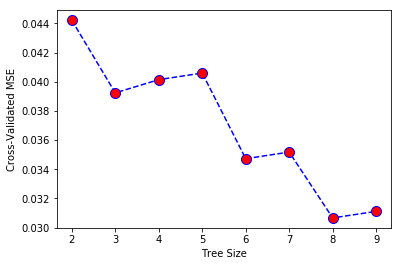

In [28]:
n=dt_error(10,x_train,y_train,x_test,y_test)

In [29]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train,y_train,x_test,y_test)

             precision    recall  f1-score   support

     female     0.9662    0.9724    0.9693       471
       male     0.9727    0.9667    0.9697       480

avg / total     0.9695    0.9695    0.9695       951



In [ ]:
from IPython.display import Image
import pydotplus
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
dot_data = tree.export_graphviz(pruned_tree, out_file=None,
                                feature_names = x_train.columns,
                                class_names = ["female", "male"],
                                filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
#save as pdf
# graph.write_pdf("AllFeaturesTree.pdf")
Image(graph.create_png())

Lowest error is 0.03608337249856638 occurs at n=8.


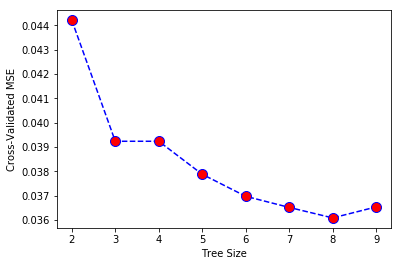

In [30]:
n=dt_error(10,x_train2,y_train2,x_test2,y_test2)

In [31]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train2,y_train2,x_test2,y_test2)

             precision    recall  f1-score   support

     female     0.9763    0.9618    0.9690       471
       male     0.9630    0.9771    0.9700       480

avg / total     0.9696    0.9695    0.9695       951



In [32]:
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
dot_data = tree.export_graphviz(pruned_tree, out_file=None,
                                feature_names = x_train2.columns,
                                class_names = ["female", "male"],
                                filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
#save as pdf
# graph.write_pdf("AllFeaturesTree.pdf")
Image(graph.create_png())

NameError: name 'os' is not defined

Lowest error is 0.034273417747435156 occurs at n=7.


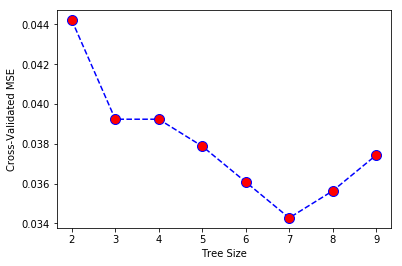

In [33]:
n=dt_error(10,x_train3,y_train3,x_test3,y_test3)

In [34]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train3,y_train3,x_test3,y_test3)

             precision    recall  f1-score   support

     female     0.9623    0.9745    0.9684       471
       male     0.9747    0.9625    0.9686       480

avg / total     0.9685    0.9685    0.9685       951



In [ ]:
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
dot_data = tree.export_graphviz(pruned_tree, out_file=None,
                                feature_names = x_train3.columns,
                                class_names = ["female", "male"],
                                filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
#save as pdf
# graph.write_pdf("AllFeaturesTree.pdf")
Image(graph.create_png())

## Random Forest
Using ensemble.RandomForestClassifier() to build the model.

In [35]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.016824395373291272 occurs at n=61.


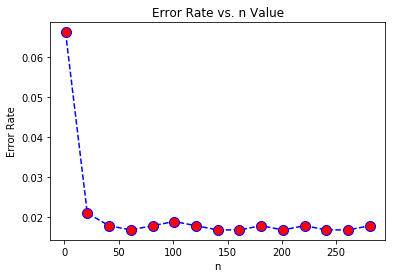

In [36]:
e=rf_error(300,x_train,y_train,x_test,y_test)

In [37]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train,y_train,x_test,y_test)

             precision    recall  f1-score   support

     female     0.9809    0.9788    0.9798       471
       male     0.9792    0.9812    0.9802       480

avg / total     0.9800    0.9800    0.9800       951



In [ ]:
e=rf_error(300,x_train2,y_train2,x_test2,y_test2)

In [ ]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train2,y_train2,x_test2,y_test2)

In [ ]:
e=rf_error(300,x_train3,y_train3,x_test3,y_test3)

In [ ]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train3,y_train3,x_test3,y_test3)

## XgBoost
Using xgboost.XGBClassifier() to build the model.

In [ ]:
model = xgboost.XGBClassifier()
classify(model,x_train,y_train,x_test,y_test)

In [ ]:
model = xgboost.XGBClassifier()
classify(model,x_train2,y_train2,x_test2,y_test2)

In [ ]:
model = xgboost.XGBClassifier()
classify(model,x_train3,y_train3,x_test3,y_test3)

## Support Vector Machine
Using svm.SVC() to build the model.

In [50]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [51]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [52]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9652683806946324
rbf  out-of-sample accuracy in SVM:  0.9726603575184016
poly  in-sample accuracy in SVM:  0.8741542625169147
poly  out-of-sample accuracy in SVM:  0.8759200841219769
linear  in-sample accuracy in SVM:  0.9715832205683356
linear  out-of-sample accuracy in SVM:  0.9789695057833859
Highest accuracy is 0.9789695057833859 occurs at linear kernel.


Lowest error is 0.01892744479495268 occurs at C=3.


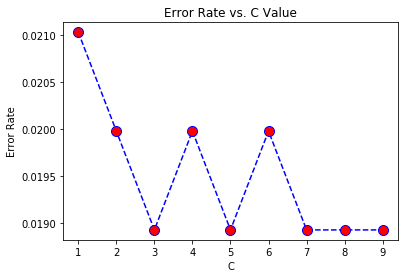

In [54]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [55]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)

             precision    recall  f1-score   support

     female     0.9850    0.9766    0.9808       471
       male     0.9773    0.9854    0.9813       480

avg / total     0.9811    0.9811    0.9811       951



In [56]:
k=svm_kernel(x_train2,y_train2,x_test2,y_test2)

rbf  in-sample accuracy in SVM:  0.9643662607126748
rbf  out-of-sample accuracy in SVM:  0.9663512092534174
poly  in-sample accuracy in SVM:  0.9305367613892648
poly  out-of-sample accuracy in SVM:  0.9221871713985279
linear  in-sample accuracy in SVM:  0.9621109607577808
linear  out-of-sample accuracy in SVM:  0.961093585699264
Highest accuracy is 0.9663512092534174 occurs at rbf kernel.


Lowest error is 0.028391167192429023 occurs at C=5.


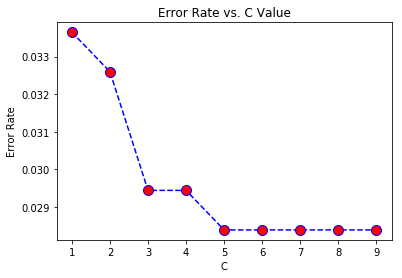

In [57]:
c=svm_error(k,10,x_train2,y_train2,x_test2,y_test2)

In [58]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train2,y_train2,x_test2,y_test2)

             precision    recall  f1-score   support

     female     0.9847    0.9575    0.9709       471
       male     0.9594    0.9854    0.9723       480

avg / total     0.9720    0.9716    0.9716       951



In [60]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.9657194406856112
rbf  out-of-sample accuracy in SVM:  0.9726603575184016
poly  in-sample accuracy in SVM:  0.939106901217862
poly  out-of-sample accuracy in SVM:  0.9474237644584648
linear  in-sample accuracy in SVM:  0.9661705006765899
linear  out-of-sample accuracy in SVM:  0.9695057833859095
Highest accuracy is 0.9726603575184016 occurs at rbf kernel.


Lowest error is 0.027339642481598318 occurs at C=1.


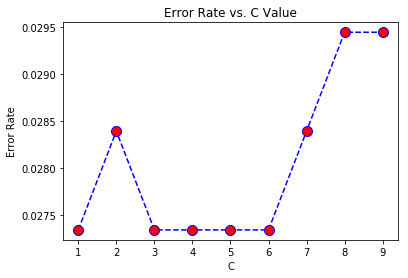

In [61]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

In [62]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train3,y_train3,x_test3,y_test3)

             precision    recall  f1-score   support

     female     0.9869    0.9575    0.9720       471
       male     0.9595    0.9875    0.9733       480

avg / total     0.9731    0.9727    0.9727       951



In [ ]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0,1)
yy = a * xx - (model.intercept_[0]) / w[1]

colors={0:"red",1:"blue"}
# Plot the hyperplane
#plt.scatter(testFeatures["IQR"],testFeatures["meanfun"],color=testLabel2.apply(lambda x:colors[x]))
plt.figure(figsize=(10,6))
plt.scatter(x_test["IQR"],x_test["meanfun"], c=y_test, s=20, cmap=plt.cm.brg)
plt.plot(xx, yy, linewidth=2, color='black')
plt.show()

## Neural Network
Using neural_network.MLPClassifier to build the model.

In [ ]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

In [ ]:
h=nn_error(20,x_train,y_train,x_test,y_test)

In [ ]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train,y_train,x_test,y_test)

In [ ]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

In [ ]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train3,y_train3,x_test3,y_test3)